In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from qiskit import *
from qiskit.tools.monitor import job_monitor

import numpy as np
import pylab as pl

from exactcover import *
import os
from matplotlib import rc
font = {'size' : 16}
rc('font', **font);
rc('text', usetex=True)

import sys
sys.path.append('../')

from qiskit_utilities.utilities import *


In [3]:
FR = np.array([
[0,0,0,0,0,0,0,1,0,1,0,0,0,1],
[0,0,0,0,0,0,0,0,1,0,0,1,0,0],
[0,0,0,0,0,0,0,1,0,0,1,0,0,0],
[0,0,0,0,0,0,0,0,1,0,0,0,1,0],
[0,0,0,0,0,0,0,1,0,1,0,0,0,1],
[0,0,0,0,0,0,0,0,1,0,0,1,0,0],
[0,0,0,0,0,0,0,1,0,0,1,0,0,0],
[0,0,0,0,0,0,0,0,1,0,0,0,1,0],
[1,1,0,0,0,1,0,0,0,0,0,0,0,0],
[1,0,1,0,0,1,0,0,0,0,0,0,0,0],
[1,0,0,1,0,0,1,0,0,0,0,0,0,1],
[1,0,0,0,1,0,1,0,0,0,0,0,0,1],
[1,1,0,0,0,1,0,0,0,0,0,0,0,0],
[1,0,1,0,0,1,0,0,0,0,0,0,0,0],
[1,0,0,1,0,0,1,0,0,0,0,0,0,1],
[1,0,0,0,1,0,1,0,0,0,0,0,0,1]
]
)
FR

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1]])

In [4]:
# FR = np.zeros((2,2))
# FR[0,0]=1
# FR[1,0]=1
# FR[0,1]=1
# FR

In [5]:
options={}
options['FR']=FR
options['usebarrier']=True
circ=createCircuit_ExactCover(np.array((0.1,0.2)), 1, options)
circ.draw()

┌───┐┌─────────┐                      ░                       ░      »
 q0_0: ┤ H ├┤ RZ(0.6) ├──■───────────────■───░───■───────────────■───░───■──»
       ├───┤└─────────┘┌─┴─┐┌─────────┐┌─┴─┐ ░   │               │   ░   │  »
 q0_1: ┤ H ├───────────┤ X ├┤ RZ(0.1) ├┤ X ├─░───┼───────────────┼───░───┼──»
       ├───┤           └───┘└─────────┘└───┘ ░ ┌─┴─┐┌─────────┐┌─┴─┐ ░   │  »
 q0_2: ┤ H ├─────────────────────────────────░─┤ X ├┤ RZ(0.1) ├┤ X ├─░───┼──»
       ├───┤                                 ░ └───┘└─────────┘└───┘ ░ ┌─┴─┐»
 q0_3: ┤ H ├─────────────────────────────────░───────────────────────░─┤ X ├»
       ├───┤                                 ░                       ░ └───┘»
 q0_4: ┤ H ├─────────────────────────────────░───────────────────────░──────»
       ├───┤                                 ░                       ░      »
 q0_5: ┤ H ├─────────────────────────────────░───────────────────────░──────»
       ├───┤                                 ░                       ░      »
 q0_6: ┤ H ├─────────────────────────────────░───────────────────────░──────»
       ├───┤                                 ░                       ░      »
 q0_7: ┤ H ├─────────────────────────────────░───────────────────────░──────»
       ├───┤                                 ░                       ░      »
 q0_8: ┤ H ├─────────────────────────────────░───────────────────────░──────»
       ├───┤                                 ░                       ░      »
 q0_9: ┤ H ├─────────────────────────────────░───────────────────────░──────»
       ├───┤                                 ░                       ░      »
q0_10: ┤ H ├─────────────────────────────────░───────────────────────░──────»
       ├───┤                                 ░                       ░      »
q0_11: ┤ H ├─────────────────────────────────░───────────────────────░──────»
       ├───┤                                 ░                       ░      »
q0_12: ┤ H ├─────────────────────────────────░───────────────────────░──────»
       ├───┤                                 ░                       ░      »
q0_13: ┤ H ├─────────────────────────────────░───────────────────────░──────»
       └───┘                                 ░                       ░      »
c0: 14/═════════════════════════════════════════════════════════════════════»
                                                                            »
«                        ░                       ░                       ░ »
« q0_0: ─────────────■───░───■───────────────■───░───■───────────────■───░─»
«                    │   ░   │               │   ░   │               │   ░ »
« q0_1: ─────────────┼───░───┼───────────────┼───░───┼───────────────┼───░─»
«                    │   ░   │               │   ░   │               │   ░ »
« q0_2: ─────────────┼───░───┼───────────────┼───░───┼───────────────┼───░─»
«       ┌─────────┐┌─┴─┐ ░   │               │   ░   │               │   ░ »
« q0_3: ┤ RZ(0.1) ├┤ X ├─░───┼───────────────┼───░───┼───────────────┼───░─»
«       └─────────┘└───┘ ░ ┌─┴─┐┌─────────┐┌─┴─┐ ░   │               │   ░ »
« q0_4: ─────────────────░─┤ X ├┤ RZ(0.1) ├┤ X ├─░───┼───────────────┼───░─»
«                        ░ └───┘└─────────┘└───┘ ░ ┌─┴─┐┌─────────┐┌─┴─┐ ░ »
« q0_5: ─────────────────░───────────────────────░─┤ X ├┤ RZ(0.2) ├┤ X ├─░─»
«                        ░                       ░ └───┘└─────────┘└───┘ ░ »
« q0_6: ─────────────────░───────────────────────░───────────────────────░─»
«                        ░                       ░                       ░ »
« q0_7: ─────────────────░───────────────────────░───────────────────────░─»
«                        ░                       ░                       ░ »
« q0_8: ─────────────────░───────────────────────░───────────────────────░─»
«                        ░                       ░                       ░ »
« q0_9: ─────────────────░───────────────────────░───────────────────────░─»
«                        ░                       

In [6]:
from qaoa import *
Aer.backends()
backend = Aer.get_backend('qasm_simulator')

In [7]:
beta_n = 40
gamma_n = 40
beta_max = np.pi
gamma_max = np.pi
optmethod='Nelder-Mead'        
shots=1024*2*2*2
rerun=True
maxdepth=10

Elandscape, gammabetas, E, best =  runQAOA(createCircuit_ExactCover, measurementStatistics_ExactCover, backend, gamma_n, beta_n, gamma_max, beta_max, optmethod=optmethod, shots=shots, rerun=rerun, maxdepth=maxdepth, options=options)

depth = 1
Calculating Energy landscape...
Calculating Energy landscape done
depth = 1 rep = 1
Optimization terminated successfully.
         Current function value: 7.400879
         Iterations: 12
         Function evaluations: 27
depth = 1 rep = 2
Optimization terminated successfully.
         Current function value: 7.489502
         Iterations: 10
         Function evaluations: 23
depth = 1 rep = 3
Optimization terminated successfully.
         Current function value: 7.350098
         Iterations: 106
         Function evaluations: 285
depth = 1 rep = 4
Optimization terminated successfully.
         Current function value: 7.400146
         Iterations: 10
         Function evaluations: 22
depth = 1 rep = 5
Optimization terminated successfully.
         Current function value: 7.428223
         Iterations: 9
         Function evaluations: 18
depth = 2
P= [0.23599704]
P= [2.0201347]
depth = 2 rep = 1
Optimization terminated successfully.
         Current function value: 9.005859
    

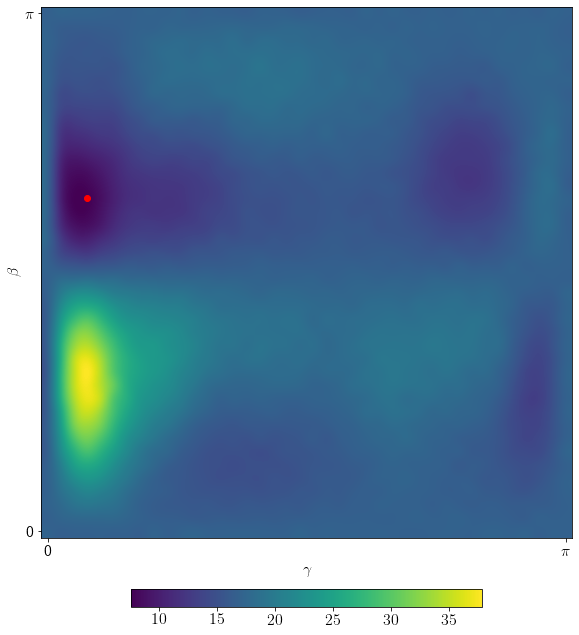

In [8]:
import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable

shiftg=gamma_max/(2*gamma_n)
shiftb=beta_max/(2*beta_n)

pl.figure(figsize=(20,10));
pl.clf()
pl.imshow(Elandscape,interpolation='spline36',origin='lower'
            ,extent=[-shiftg,gamma_max+shiftg,-shiftb,beta_max+shiftb], aspect=1)
pl.xticks([0,gamma_max], ['0', r'$\pi$'])
pl.yticks([0,beta_max], ['0', r'$\pi$'])
pl.xlabel('$\gamma$',loc='center')
pl.ylabel(r'$\beta$',loc='center')
pl.colorbar(shrink=0.25, pad=0.075, orientation="horizontal")
pl.plot(gammabetas['xL_d1'][0], gammabetas['xL_d1'][1],'or')

pl.tight_layout()


In [9]:
circuit = createCircuit_ExactCover(gammabetas['xL_d1'], 1, options = options)
job = execute(circuit, backend, shots=shots)
successProbability(job.result().results, options)

[0.1634521484375]

In [10]:
circuit = createCircuit_ExactCover(gammabetas['xL_d4'], 4, options = options)
job = execute(circuit, backend, shots=shots)
successProbability(job.result().results, options)

[0.1527099609375]

In [11]:
circuit = createCircuit_ExactCover(gammabetas['xL_d6'], 6, options = options)
job = execute(circuit, backend, shots=shots)
successProbability(job.result().results, options)

[0.1845703125]

In [12]:
circuit = createCircuit_ExactCover(gammabetas['xL_d8'], 8, options = options)
job = execute(circuit, backend, shots=shots)
successProbability(job.result().results, options)

[0.1851806640625]

In [13]:
circuit = createCircuit_ExactCover(gammabetas['xL_d10'], 10, options = options)
job = execute(circuit, backend, shots=shots)
successProbability(job.result().results, options)

[0.1898193359375]

In [14]:
sp=[]
for i in range(1,maxdepth+1):
    circuit = createCircuit_ExactCover(gammabetas['xL_d'+str(i)], i, options = options)
    job = execute(circuit, backend, shots=shots)
    sp.append(successProbability(job.result().results, options)[0])

Text(0, 0.5, 'success prob.')

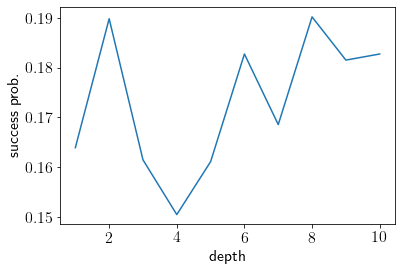

In [15]:
pl.plot(range(1,maxdepth+1),sp)
pl.xlabel('depth')
pl.ylabel('success prob.')